In [2]:
import cv2, numpy as np
import math
import time
import random
from matplotlib import pyplot as plt
%matplotlib inline


def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

In [6]:
orb = cv2.ORB_create()

matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)


images = ['book1.jpg', 'book2.jpg', 'book3.jpg', 'book4.jpg', ] 

database_kp = []
database_desc = []
for name in images :
    img = cv2.imread(name, cv2.IMREAD_GRAYSCALE)
    keypoints, desc = orb.detectAndCompute(img, None)
    database_kp.append(keypoints)
    database_desc.append(desc)
    
    
    

In [12]:
test = cv2.imread("book4_1test.jpg", cv2.IMREAD_GRAYSCALE)
keypoints, desc = orb.detectAndCompute(test, None)

45.54
42.04
50.88
24.04


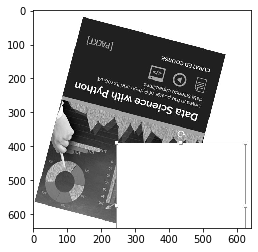

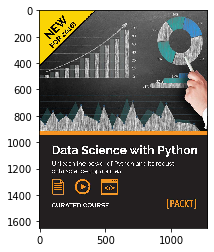

In [13]:
min_distance = 1000
idx = -1
for i in range(len(images)) :   
    matches = matcher.match(desc, database_desc[i])
    matches = sorted(matches, key=lambda x: x.distance)
    good_matches = matches[:50]
    
    distance = 0
    for d  in good_matches :
        distance += d.distance
    distance /= len(good_matches)    
    print(distance)
        
    if  min_distance > distance :
        min_distance = distance
        idx = i

imshow("", test  )
imshow("", cv2.imread(images[idx])      )

In [15]:
src1 = cv2.imread('box.png', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('box_in_scene.png', cv2.IMREAD_GRAYSCALE)
    
keypoints1, desc1 = orb.detectAndCompute(src1, None)
keypoints2, desc2 = orb.detectAndCompute(src2, None)

matches = matcher.match(desc1, desc2)
matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:50]

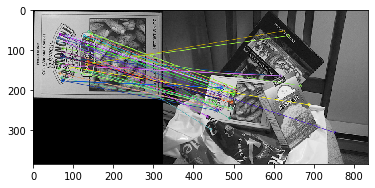

In [18]:
pts1 = np.array([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)
pts2 = np.array([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)

print(pts1.shape)  # 50,1,2
print(pts2.shape)  # 50,1,2

print(pts1)

(50, 1, 2)
(50, 1, 2)
[[[141.00482  155.52002 ]]

 [[139.96802   55.296005]]

 [[134.36931   87.09122 ]]

 [[ 70.84801  167.61601 ]]

 [[143.07841   66.35521 ]]

 [[127.87201   63.936005]]

 [[134.78401  150.33601 ]]

 [[ 89.85601  162.43202 ]]

 [[128.56322   64.28161 ]]

 [[ 64.28161   68.42881 ]]

 [[141.69601  155.52002 ]]

 [[ 88.128006  62.208008]]

 [[143.42401   65.66401 ]]

 [[ 74.30401  103.68001 ]]

 [[126.48962  155.52002 ]]

 [[ 63.936005  69.12001 ]]

 [[ 74.4      176.40001 ]]

 [[126.14401  155.52002 ]]

 [[ 64.28161  145.15202 ]]

 [[134.78401   72.57601 ]]

 [[136.8      132.      ]]

 [[ 74.880005 175.68001 ]]

 [[136.51201  127.87201 ]]

 [[ 65.66401  157.24802 ]]

 [[ 74.64961  116.12161 ]]

 [[ 76.032005 115.77601 ]]

 [[ 76.72321  134.78401 ]]

 [[ 60.480007  77.76001 ]]

 [[145.15201   58.752007]]

 [[136.85762  147.22562 ]]

 [[ 70.50241  118.19521 ]]

 [[ 70.50241  114.04802 ]]

 [[ 66.35521  157.59363 ]]

 [[ 80.870415  64.28161 ]]

 [[122.42538   98.5375  ]]

In [19]:
H, _ = cv2.findHomography(pts1, pts2, cv2.RANSAC)

print(H)

[[ 4.85610150e-01 -1.26423343e-01  1.16639863e+02]
 [ 3.62734153e-02  4.76039278e-01  1.58710108e+02]
 [-1.20390936e-04 -1.08741047e-04  1.00000000e+00]]


In [20]:
(h, w) = src1.shape[:2]
corners1 = np.array([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2).astype(np.float32)
corners2 = cv2.perspectiveTransform(corners1, H)

print(corners1)
print(corners2)

[[[  0.   0.]]

 [[  0. 222.]]

 [[323. 222.]]

 [[323.   0.]]]
[[[116.63986 158.71011]]

 [[ 90.76499 270.93124]]

 [[261.93488 294.67987]]

 [[284.5573  177.32181]]]


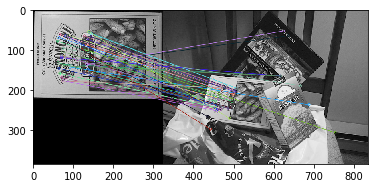

In [26]:
dst = cv2.drawMatches(src1, keypoints1, src2, keypoints2, good_matches, None,
                         flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
imshow("", dst)

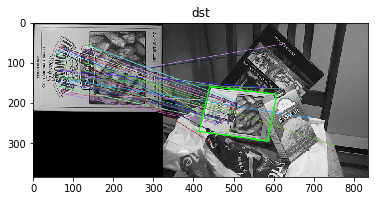

In [27]:
corners3 = corners2 + np.float32([w, 0]) 

cv2.polylines(dst, [np.int32(corners3)], True, (0, 255, 0), 2, cv2.LINE_AA)

imshow('dst', dst)

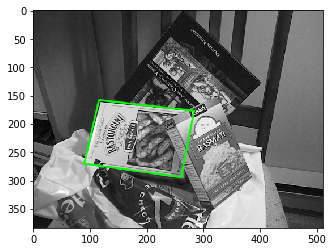

In [29]:
test = cv2.imread('box_in_scene.png')
cv2.polylines(test, [np.int32(corners2)], True, (0, 255, 0), 2, cv2.LINE_AA)

imshow('', test)

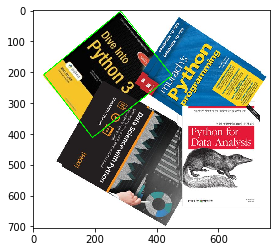

In [33]:
def findBook(src1, src2) :    

src1 = cv2.imread('book2.jpg', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('bookscene.jpg', cv2.IMREAD_GRAYSCALE)
    
keypoints1, desc1 = orb.detectAndCompute(src1, None)
keypoints2, desc2 = orb.detectAndCompute(src2, None)

matches = matcher.match(desc1, desc2)
matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:50]

pts1 = np.array([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)
pts2 = np.array([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)

H, _ = cv2.findHomography(pts1, pts2, cv2.RANSAC)

(h, w) = src1.shape[:2]
corners1 = np.array([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2).astype(np.float32)
corners2 = cv2.perspectiveTransform(corners1, H)

test = cv2.imread('bookscene.jpg')
cv2.polylines(test, [np.int32(corners2)], True, (0, 255, 0), 2, cv2.LINE_AA)

imshow('', test)

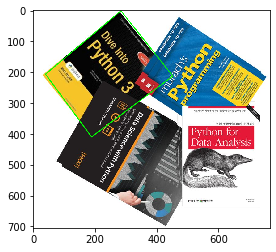

In [35]:
def findBook(query, scene) : 
    
    src1 = cv2.cvtColor(query, cv2.COLOR_BGR2GRAY)
    src2 = cv2.cvtColor(scene, cv2.COLOR_BGR2GRAY)
    
    keypoints1, desc1 = orb.detectAndCompute(src1, None)
    keypoints2, desc2 = orb.detectAndCompute(src2, None)

    matches = matcher.match(desc1, desc2)
    matches = sorted(matches, key=lambda x: x.distance)
    good_matches = matches[:50]

    pts1 = np.array([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)
    pts2 = np.array([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)

    H, _ = cv2.findHomography(pts1, pts2, cv2.RANSAC)

    (h, w) = src1.shape[:2]
    corners1 = np.array([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2).astype(np.float32)
    corners2 = cv2.perspectiveTransform(corners1, H)
    
    return np.int32(corners2)




q = cv2.imread('book2.jpg')
s = cv2.imread('bookscene.jpg')

corner = findBook(q, s)

cv2.polylines(s, [corner], True, (0, 255, 0), 2, cv2.LINE_AA)

imshow("", s)